Hi! This notebook takes in frames of an animation, and transform it into one long continuous MIDI file.

Example: https://www.youtube.com/watch?v=httcXndMcFY

Let me know if you're not sure where to change to make this work on your video.

-- Punji

In [ ]:
pip install mido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 3.2 MB/s 


In [ ]:
pip install pypianoroll

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 7.6 MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591954 sha256=4d140abac4372551c4555b06abb8f8202c67f143cc556a2a7a1fbdff91d6d10c
  Stored in directory: /root/.cache/pip/wheels/2a/5a/e3/30eeb9a99350f3f7e21258fcb132743eef1a4f49b3505e76b6
Successfully built pretty-midi


In [ ]:
import mido
from mido import Message, MidiFile, MidiTrack
import pypianoroll
from PIL import Image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
def imageTransformer(image):
    train_transform = transforms.Compose([
    transforms.Resize((88,120)),
    transforms.ToTensor()
    ])
    
    return train_transform(image)

In [ ]:
def numpyToMidi(mid, arr, startDelta):
  on = [False for i in range(88)]
  deltaTime = startDelta
  for time in range(120):
    hadAnEvent = False
    for pitch in range(88):
      if arr[87-pitch][time] < 0.5:
        
        #Check if the note ends
        if on[pitch]:
          mid.tracks[0].append(Message('note_off', note=pitch, velocity=64, time=deltaTime))
          if not hadAnEvent: 
            hadAnEvent = True
            deltaTime = 0

        on[pitch] = False

      elif arr[87-pitch][time] >= 0.5:

        #Check if the note starts
        if not on[pitch]: 
          mid.tracks[0].append(Message('note_on', note=pitch, velocity=64, time=deltaTime))
          if not hadAnEvent: 
            hadAnEvent = True
            deltaTime = 0

        on[pitch] = True
    
    deltaTime += 16

  happened = False
  for pitch in range(88):
    if on[pitch]: 
      mid.tracks[0].append(Message('note_off', note=pitch, velocity=64, time=deltaTime))
      if not happened:
        deltaTime = 0
        happened = True
      on[pitch] = False
  
  return deltaTime

In [ ]:
def imagesToMidi():
  mid = MidiFile()
  track = MidiTrack()
  mid.tracks.append(track)

  deltaTime = 0
  for frame in tqdm(range(6562)):
    fileName = f"/content/drive/MyDrive/bad_apple_is/bad_apple_{trueIndex(frame)}.png"
    img = imageTransformer(Image.open(fileName)).numpy().reshape((88,120))
    finalImg = np.where(img > 0.5, 1, 0)

    deltaTime = numpyToMidi(mid, finalImg, deltaTime)

  return mid


480


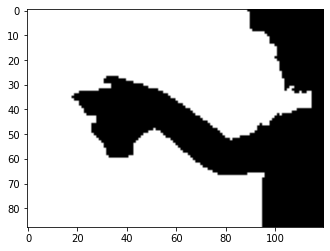

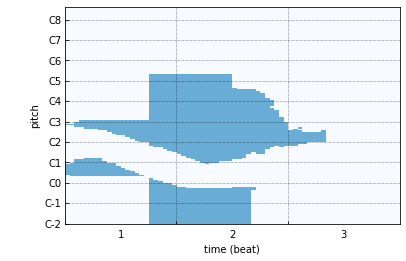

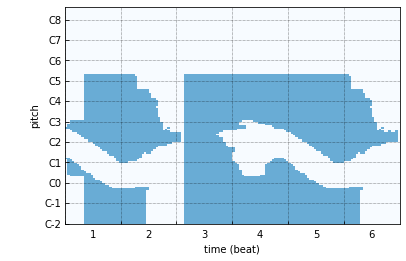

In [ ]:
#THIS CELL IS FOR DEBUGGING
sampleImg = imageTransformer(Image.open("/content/drive/MyDrive/bad_apple_is/bad_apple_1215.png")).numpy().reshape((88,120))
sampleFinal = np.where(sampleImg > 0.5, 1, 0)
plt.imshow(sampleFinal, cmap="gray")


sampleMid = MidiFile()
print(sampleMid.ticks_per_beat)
sampleTrack = MidiTrack()
sampleMid.tracks.append(sampleTrack)

numpyToMidi(sampleMid, sampleFinal, 0)

sampleMid.save('new_song.mid')

ppr = pypianoroll.read('new_song.mid')
ppr.plot()

numpyToMidi(sampleMid, sampleFinal, 0)

sampleMid.save('new_song.mid')

ppr = pypianoroll.read('new_song.mid')
ppr.plot()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def trueIndex(number):
  if number + 1 < 10:
    return "00" + str(number + 1)
  elif number + 1 < 100:
    return "0" + str(number + 1)
  else:
    return number + 1

In [ ]:
# 6562 frames in total



imagesToMidi().save('new_song.mid')


100%|██████████| 6562/6562 [26:16<00:00,  4.16it/s]
